In [1]:
import math
def EXP(x):
    return(math.exp(x))


def LOG10(x):
    return(math.log10(x))
'''
KPP_REAL FUNCTION TUN( A0,B0,C0 )
      REAL A0,B0,C0
      TUN =  DBLE(A0) * EXP(-DBLE(B0)/TEMP) * EXP(DBLE(C0)/TEMP**3)
   END FUNCTION TUN
'''
def TUN(A0, B0, C0, TEMP):
    return(A0 * EXP(B0/TEMP) * EXP(C0/TEMP**3))

def ARR(*args):
    return 10E-11

'''
KPP_REAL FUNCTION ALK ( A0,B0,C0,n,X0,Y0)
      REAL A0,B0,C0,n,X0,Y0
      REAL(kind=dp) K0, K1, K2, K3, K4
      K0 = 2.0E-22_dp * EXP(DBLE(n))
      K1 = 4.3E-1_dp*(TEMP/298.0_dp)**(-8)
      K0 = K0*CFACTOR
      K1 = K0/K1
      K2 = (K0/(1.0_dp+K1))*   &
           4.1E-1_dp**(1.0_dp/(1.0_dp+(LOG10(K1))**2))
      K3 = DBLE(C0)/(K2+DBLE(C0))
      K4 = DBLE(A0)*(DBLE(X0)-TEMP*DBLE(Y0))
      ALK = K4 * EXP(DBLE(B0)/TEMP) * K3
   END FUNCTION ALK
'''
def ALK(A0, B0, C0, n, X0, Y0, TEMP, CFACTOR):
    K0 = 2.0E-22 * EXP(n)
    K1 = 4.3E-1 * (TEMP/298.0) ** (-8)
    K0 = K0 * CFACTOR
    K1 = K0/K1
    K2 = (K0/(1.0 + K1)) * 4.1E-1 ** (1.0/(1.0 + (LOG10(K1)) ** 2))
    K3 = C0/(K2 + C0)
    K4 = A0 * (X0 - TEMP * Y0)
    ALK = K4 * EXP(B0/TEMP) * K3
    return(ALK)


'''
KPP_REAL FUNCTION NIT ( A0,B0,C0,n,X0,Y0)
      REAL A0,B0,C0,n,X0,Y0
      REAL(kind=dp) K0, K1, K2, K3, K4
      K0 = 2.0E-22_dp * EXP(DBLE(n))
      K1 = 4.3E-1_dp*(TEMP/298.0_dp)**(-8)
      K0 = K0*CFACTOR
      K1 = K0/K1
      K2 = (K0/(1.0_dp+K1))*   &
           4.1E-1_dp**(1.0_dp/(1.0_dp+(LOG10(K1))**2))
      K3 = K2/(K2+DBLE(C0))
      K4 = DBLE(A0)*(DBLE(X0)-TEMP*DBLE(Y0))
      NIT = K4 * EXP(DBLE(B0)/TEMP) * K3
   END FUNCTION NIT
'''
def NIT(A0, B0, C0, n, X0, Y0, TEMP, CFACTOR):
    K0 = 2.0E-22 * EXP(n)
    K1 = 4.3E-1 *(TEMP/298.0) ** (-8)
    K0 = K0 * CFACTOR
    K1 = K0/K1
    K2 = (K0/(1.0 + K1)) * 4.1E-1 ** (1.0 /(1.0 +(LOG10(K1)) ** 2))
    K3 = K2/(K2 + C0)
    K4 = A0*(X0 - TEMP * Y0)
    NIT = K4 * EXP(B0/TEMP) * K3
    return(NIT)


'''
KPP_REAL FUNCTION ISO1( A0,B0,C0,D0,E0,F0,G0 )
      REAL A0,B0,C0,D0,E0,F0,G0
      REAL(kind=dp) K0, K1, K2
      K0 = DBLE(D0)*EXP(DBLE(E0)/TEMP)*EXP(1.E8/TEMP**3)
      K1 = DBLE(F0)*EXP(DBLE(G0)/TEMP)
      K2 = DBLE(C0)*K0/(K0+K1)
      ISO1 =  DBLE(A0) * EXP(DBLE(B0)/TEMP) * (1.-K2)
   END FUNCTION ISO1 
'''
def ISO1(A0, B0, C0, D0, E0, F0, G0, TEMP):
    K0 = D0 * EXP(E0/TEMP) * EXP(1.E8/TEMP**3)
    K1 = F0 * EXP(G0/TEMP)
    K2 = C0 * K0/(K0+K1)
    ISO1 = A0 * EXP(B0/TEMP) * (-(K2-1))
    return ISO1


'''
KPP_REAL FUNCTION ISO2( A0,B0,C0,D0,E0,F0,G0 )
  REAL A0,B0,C0,D0,E0,F0,G0
  REAL(kind=dp) K0, K1, K2
  K0 = DBLE(D0)*EXP(DBLE(E0)/TEMP)*EXP(1.E8/TEMP**3)
  K1 = DBLE(F0)*EXP(DBLE(G0)/TEMP)
  K2 = DBLE(C0)*K0/(K0+K1)
  ISO2 =  DBLE(A0) * EXP(DBLE(B0)/TEMP) * K2
END FUNCTION ISO2   
'''
def ISO2(A0, B0, C0, D0, E0, F0, G0, TEMP):
    K0 = D0 * EXP(E0/TEMP) * EXP(1.E8/TEMP**3)
    K1 = F0 * EXP(G0/TEMP)
    K2 = C0 * K0/(K0+K1)
    ISO2 = A0 * EXP(B0/TEMP) * K2
    return ISO2


'''
KPP_REAL FUNCTION EPO(A1,E1,M1) 
  REAL A1, E1, M1
  REAL(kind=dp) K1      
  K1 = 1.0_dp/(DBLE(M1) * CFACTOR + 1.0_dp)
  EPO = DBLE(A1) * EXP(DBLE(E1)/TEMP) *  K1
END FUNCTION EPO
'''
def EPO(A1, E1, M1, TEMP, CFACTOR):
    K1 = 1 / (M1 * CFACTOR + 1)
    EPO = A1 * EXP(E1/TEMP) * K1
    return EPO


'''
KPP_REAL FUNCTION KCO(A1,M1) 
  REAL A1, M1
  KCO = DBLE(A1) * (1.0_dp + (CFACTOR / DBLE(M1)))
END FUNCTION KCO
'''
def KCO(A1, M1, CFACTOR):
    KCO = A1 * (1 + (CFACTOR/M1))
    return KCO


'''
KPP_REAL FUNCTION FALL ( A0,B0,C0,A1,B1,C1,CF)
  REAL A0,B0,C0,A1,B1,C1,CF
  REAL(kind=dp) K0, K1     
  K0 = DBLE(A0) * EXP(DBLE(B0)/TEMP) * (TEMP/300.0_dp)**DBLE(C0)
  K1 = DBLE(A1) * EXP(DBLE(B1)/TEMP) * (TEMP/300.0_dp)**DBLE(C1)
  K0 = K0*CFACTOR
  K1 = K0/K1
  FALL = (K0/(1.0_dp+K1))*   &
       DBLE(CF)**(1.0_dp/(1.0_dp+(LOG10(K1))**2))
END FUNCTION FALL
'''


def FALL(A0,B0,C0,A1,B1,C1,CF, TEMP, CFACTOR):
    K0 = A0 * EXP(B0/TEMP) * (TEMP/300)**C0
    K1 = A1 * EXP(B1/TEMP) * (TEMP/300)**(C1)
    K0 = K0*CFACTOR
    K1 = K0/K1
    FALL = (K0 / (1.00+K1) * CF**(1 / (1 + LOG10(K1)) **2))
    return FALL


'''
KPP_REAL FUNCTION TROE ( A0,B0,C0,A1,B1,C1,CF)
  REAL A0,B0,C0,A1,B1,C1,CF
  REAL(kind=dp) K0, K1, KR, NC, F     
  K0 = DBLE(A0) * EXP(DBLE(B0)/TEMP) * (TEMP/300.0_dp)**DBLE(C0)
  K1 = DBLE(A1) * EXP(DBLE(B1)/TEMP) * (TEMP/300.0_dp)**DBLE(C1)
  K0 = K0*CFACTOR
  KR = K0/K1
  NC = 0.75_dp-1.27_dp*(LOG10(DBLE(CF)))
  F  = 10.0_dp**(LOG10(DBLE(CF))/(1+(LOG10(KR)/NC)**2))
  TROE = K0*K1*F/(K0+K1)
END FUNCTION TROE
'''
def TROE(A0, B0, C0, A1, B1, C1, CF, TEMP, CFACTOR):
    K0 = A0 * EXP(B0/TEMP) * (TEMP/300) * C0
    K1 = A1 * EXP(B1/TEMP) * (TEMP/300) * C1
    K0 = K0 * CFACTOR
    KR = K0/K1
    NC = 0.75 - 1.27 * LOG10(CF)
    F = 10 ** ((LOG10(CF)) / (1+(LOG10(KR)/NC)**2))
    TROE = K0*K1*F / (K0+K1)
    return TROE

In [2]:
background_spc = ['CO2','CS2','CO','H2CO3','COS','M','O2','OH','HO2',
                  'NO','NO2','NO3','MO2','H2O','H2O2','H2Od','O3',
                  'SO2','H2S','HF','H2S','N2H4','HN3','HI','HBr',
                  'HCl','HCN','H2Se','H2Te','NH2OH','HBrO','HClO','H3PO2','HPO3',
                  'H2O3','OF2','O2F2','NOHSO4','N2O5','N2F4','N2O4','N2O3','HNO3',
                  'HNO2','N2O','NF5','NI3','H2S','H2SO4','H2SO3','SO2Cl2','S4N4','H2SO5',
                  'H2S2O7','S2F10','H3NO3S','Br2S','SF6','SF4'
    ]

def read_eqns(eqn_file):
    '''Read .eqn files
    Parameters
    ----------
    eqn_file: .eqn file
      The .eqn file to read

    Returns
    ----------
    species: list
      A list of tuples. The first element in the tuple is an equation.
      The second element in the tuple is reaction rate. 
    '''
  
    equations = None
    with open(eqn_file,'r') as f:
        lines = f.readlines()
        equantions = lines[:]
    equations = [i.strip() for i in equantions[1:]]
    equations = [tuple(i.split(':')) for i in equations if len(i)>0]
    equations = [(i[0].strip(),i[1].strip().strip(';')) for i in equations]
    return(equations)

def read_spc(spc_file):
    '''Read .spc files and process the raw input into species
    Parameters
    ----------
    spc_file: .eqn file
        The .spc file to read
    
    Returns
    ----------
    species: list
        List of species.
    '''
    species = None
    with open(spc_file,'r') as f:
        lines = f.readlines()
        species = lines[:]
    species = [s.split('=')[0].strip() for s in species]
    species = [s for s in species if s and s[0]!='#' and s not in background_spc]
    return(species)


def read_def(def_file):
    '''Read .def file and get initial values for species and temperature
    Parameters
    ----------
    def_file: .def file
        The .def file to read
    
    Returns
    ----------
    init_values_dict: dict
        A dictionary storing some initial values.
    TEMP: float
        Temperature value
    '''
    import re
    init_values = None
    TEMP = None
    with open(def_file, 'r') as f:
        lines = f.readlines()
        TEMP = [line.strip() for line in lines if line.strip().startswith('TEMP')]
        idx = [i for i in range(len(lines)) if (lines[i].startswith('#INITVALUES')) or (lines[i].startswith('#INLINE F90'))]
        init_values = lines[idx[0]+2:idx[1]-1]

    init_values = [i.strip().split('=') for i in init_values]
    init_values_dict = {}
    for c, val in init_values:
        init_values_dict[c.strip()] = float(re.sub(';', '', val).strip())
    TEMP = float(TEMP[0].split(' = ')[1])
    return(init_values_dict, TEMP)

In [3]:
import numpy as np
import re
from collections import defaultdict
def get_reactants(eqn):
    '''
    Get reactants from an equation (ignore background species)
    Parameters
    ----------
    eqn: tuple
        An equation.
    
    Returns
    ----------
    reactants_spc: tuple
        A tuple of reactants in the equation
    '''
    find_alpha_index = lambda x:re.search(r'[a-z]', x, re.I).start()
    reaction, k = eqn
    reactants = reaction.split(' = ')[0].split(' + ') # get reactants
    reactants = [i.strip() for i in reactants]
    # get reactant species name
    reactants_spc = [i[find_alpha_index(i):] for i in reactants]
    reactants_spc = [r for r in reactants_spc if r not in background_spc]
    return(tuple(reactants_spc))

def get_products(eqn):
    '''
    Get products from an equation (ignore background species)
    Parameters
    ----------
    eqn: tuple
        An equation.
    
    Returns
    ----------
    products_spc: tuple
        A tuple of products in the equation
    '''
    find_alpha_index = lambda x:re.search(r'[a-z]', x, re.I).start() # helper function
    reaction, k = eqn
    products = reaction.split(' = ')[1].split(' + ') # get products
    products = [i.strip() for i in products]
    # get products species name
    products_spc = [i[find_alpha_index(i):] for i in products]
    products_spc = [r for r in products_spc if r not in background_spc]
    return(tuple(products_spc))

def get_properties(eqns):
    '''
    Get reactants and products from equations
    Parameters
    ----------
    eqns: list
        A List of tuples storing equations
    
    Returns
    ----------
    ret: dict
        A dict of dicts storing reactants and products for each equation
    '''
    ret = defaultdict(dict)
    for i in range(0, len(eqns)):
        eqn = eqns[i]
        reactants = get_reactants(eqn)
        products = get_products(eqn)
        ret[i]['reactants'] = reactants
        ret[i]['products'] = products
    return(ret)

# '''
# if a species is a reactant for the equation, 'r' is marked
# if a species is a product for the equation, 'p' is marked
# '''
def get_eqns_involve_species(species, eqns):
    '''
    Get equations involving specified sepcies. 
    If a species is a reactant for the equation, 'r' is marked;
    if a species is a product for the equation, 'p' is marked.

    Parameters
    ----------
    species: str
        Species
    eqns: list
        A List of tuples storing equations
    
    Returns
    ----------
    eqns_idx: list
        A list of tuples storing indicators of reactants or products and index of equations.
    '''
    eqns_idx = []
    properties_dict = get_properties(eqns)
    for i in range(0, len(eqns)):
        
        if species in properties_dict[i]['products']:
            eqns_idx.append(('p', i))
        if species in properties_dict[i]['reactants']:
            eqns_idx.append(('r', i))
    return(eqns_idx)

def calculate_weight(eqn, inits, rounded = False):
    '''Calculate weights for a given equation
    Parameters
    ----------
    eql: tuple
        The first element of the tuple is an equation. The second element is reaction rate.
    inits: dict
        A dictionary storing some initial values
    
    Returns
    ----------
    weight_dict: dict
        A dictionary storing the weights
    '''

    find_alpha_index = lambda x:re.search(r'[a-z]', x, re.I).start() # helper function
    initial_values_dict, TEMP = inits
    CFACTOR = float(initial_values_dict['CFACTOR'])
    reaction, k = eqn
    reactants = reaction.split(' = ')[0].split(' + ') # get reactants
    reactants = [i.strip() for i in reactants] 
    products = reaction.split(' = ')[1].split(' + ') # get products
    products = [i.strip() for i in products]

    # get reactants mole values
    reactants_mole = [float(i[:find_alpha_index(i)]) 
            if find_alpha_index(i)!=0 else 1 for i in reactants] # no idea of how to use this
    # get reactant species name 
    reactants_spc = [i[find_alpha_index(i):] for i in reactants]
    # get products mole values
    products_mole = [float(i[:find_alpha_index(i)]) 
            if find_alpha_index(i)!=0 else 1 for i in products]
    # get products species name 
    products_spc = [i[find_alpha_index(i):] for i in products]

    # v = 1 # assume the stoichiometric coefficient is 1 (might need to fix)
    SUN = 0.5 # random initial value for sun; need to fix !
    funs_temp_cf = ['ALK', 'NIT','TROE','FALL','EPO'] 
    funs_temp = ['TUN','ISO1','ISO2','ARR']
    funs_cf = ['KCO']
    if any([k for i in funs_temp_cf if i in k]):
        k = k[:-1] + ', TEMP, CFACTOR)'
    if any([k for i in funs_temp if i in k]):
        k = k[:-1] + ', TEMP)'
    if any([k for i in funs_cf if i in k]):
        k = k[:-1] + ', CFACTOR)'
    if 'D' in k:
        k = k.replace('D','E')
    k_val = float(eval(k))
    if rounded:
        k_val = round(k_val, 4)
    ls_concentration = []
    for i in reactants:
        if i in initial_values_dict.keys():
            ls_concentration.append(initial_values_dict[i])
        else:
            ls_concentration.append(initial_values_dict['ALL_SPEC'])
    # weight = v * k_val * np.prod(ls_concentration)
    weight_dict = defaultdict(dict) # key: product; value: dict{reactant:weight}
#     print(k_val, ls_concentration)
    for product, mole in zip(products_spc,products_mole):
        weight = mole * k_val * np.prod(ls_concentration)
        for reactant in reactants_spc:
            if reactant not in background_spc and product not in background_spc:
                weight_dict[product][reactant] = weight
    # return(weight)
    return weight_dict  


def calculate_all_weights(eqns, inits, rounded=False):
    '''
    Calculate all weights for the input
    Parameters
    ----------
    eql: tuple
        The first element of the tuple is an equation. The second element is reaction rate.
    inits: dict
        A dictionary storing some initial values
    
    Returns
    ----------
    all_weight_dict: dict
        A dictionary storing the weights
    '''
    all_weight_dict = defaultdict(dict)
    for i in range(len(eqns)):
        weight_dict = calculate_weight(eqns[i],inits, rounded)
        products = [i for i in weight_dict.keys()]
        inner_dict = defaultdict(dict)
        for product in products:
            reactants = [i for i in weight_dict[product]]
            inner_dict_key = (i, tuple(reactants))
            for reactant in reactants:
                inner_dict[reactant] = weight_dict[product][reactant]
            all_weight_dict[product][inner_dict_key] = inner_dict
    return all_weight_dict

    
def get_weight(eqns, idx, all_weights_dict, reactant_spc):
    eqn = eqns[idx]
    products = get_products(eqn)
    all_weight = 0.0
    for i in products:   ## maybe contains mutiple products, all weights from all products
        for key in list(all_weights_dict[i].keys()):
            if idx in key: 
                all_weight+=all_weights_dict[i][key][reactant_spc]
    return(all_weight)

# """
# species_a: product str (main species)
# species_b: reactant str
# weight_dict: a dictionary from calculate_allweight function
# """
def calculate_r(species_a, species_b, all_weights_dict, eqns):
    a_eqns = get_eqns_involve_species(species_a, eqns)
    b_eqns = get_eqns_involve_species(species_b, eqns)
    a_idx = [eqn_idx for (species_type, eqn_idx) in a_eqns]
    b_idx = [eqn_idx for (species_type, eqn_idx) in b_eqns]
    numerator_eqn_list = a_idx and b_idx # eqns that species a and species b both involve in
    if len(numerator_eqn_list) == 0:
        return('There is no reaction to produce ' + species_a + ' from ' + species_b + '.')

    numerator = 0.0
    for i in numerator_eqn_list:
        a_prod_eqns = [x for x in a_eqns if (x[0] == 'p') and (x[1] == i)]
        for (species_type, eqn_idx) in a_prod_eqns:
            for t in all_weights_dict[species_a].keys():
                idx = t[0] # first position is the eqn_idx
                if idx == eqn_idx:
                    reactants = list(t[1])
                    value = list(all_weights_dict[species_a][t].values())
                    value = [abs(v) for v in value]
                    numerator += abs(sum(value))
    
    denominator = 0.0
    # species_a as products
    for t in all_weights_dict[species_a].keys():
        reactants = t[1] # second position in the tuple
        reactants = list(reactants)
        for reactant in reactants:
            denominator += abs(all_weights_dict[species_a][t][reactant])
    # species_a as reactants
    for r in a_eqns:
        if species_type == 'r':
            denominator += get_weight(eqns, eqn_idx, all_weights_dict, species_a)
    
    if denominator == 0:
        return(0)
    else:
        return(numerator/denominator)


def calculate_all_r(all_weights_dict, eqns):
    products_list = list(all_weights_dict.keys())
    rAB_dict = defaultdict(dict)
    for product in products_list:
        reactant_unique_list = list(set([i for key in all_weights_dict[product].keys() for i in list(key[1])]))
        for reactant in reactant_unique_list:
            rAB_dict[product][reactant] = calculate_r(product, reactant, all_weights_dict, eqns)
    return(rAB_dict)

In [4]:
import operator
from graphviz import Digraph

def dfs(graph, start, visited=None):
    '''
    Depth-First Search Non-Recursive Function
    :param graph: dictionary 
    :param start: starting node for the search
    :param visited: dictionary for already visited node
    :return: updated dictionary
    '''
    if visited == None:
        visited = defaultdict(lambda: False)
    if visited[start]:
        return visited
    stack = [start]
    while stack:
        vertex = stack.pop()
        if visited[vertex]:
            continue
        visited[vertex] = True
        for neighbor in graph[vertex]:
            if not visited[neighbor]:
                stack.append(neighbor)
    return visited

def get_dependent_set(graph, starting_set, method='DFS'):
    '''
    Get the dependent set given the starting set
    :param graph: 
    :param starting_set: list like object containing species
    :param method: searching algorithm. Default is depth-first search
    :return: a list of species
    '''
    if method == 'DFS':
        visited = defaultdict(lambda: False)
        for specie in starting_set:
            visited = dfs(graph, specie, visited)
        return list(visited.keys())
    else:
        raise Exception('method not implemented')

def visualize_graph(graph, name='Example'):
    g = Digraph(comment=name, format='png')
    for item in graph.items():
        for rec in item[1]:
            g.edge(item[0], rec)
    return g

class ChemGraph:

    def __init__(self, dict_all_r_ab):
        self.dict = dict_all_r_ab

    def get_skeleton_graph(self, epsilon):
        graph = defaultdict(set)
        for key in self.dict:
            rec_dict = self.dict[key]
            for rec in rec_dict.keys():
                r = rec_dict[rec]
                if r >= epsilon:
                    graph[key].add(rec)
        return graph

    def get_all_skeleton_graph(self, epsilons, method='naive'):
        ret_dict = {}
        if method == 'naive':
            for epsilon in epsilons:
                ret_dict[epsilon] = self.get_skeleton_graph(epsilon)
            return ret_dict
        elif method == 'incrementive':
            epsilons = sorted(epsilons)
            tups = [(d[0], rec[0], rec[1]) for d in self.dict.items() for rec in d[1].items()]
            sorted_tups = sorted(tups, key=operator.itemgetter(2))
            start_index = 0
            n = len(sorted_tups)
            for e in epsilons:
                while start_index < n:
                    if sorted_tups[start_index][2] < e:
                        break
                    start_index += 1
                included_tup = sorted_tups[0:start_index]
                temp_graph = defaultdict(set)
                for t in included_tup:
                    temp_graph[t[0]].add(t[1])
                ret_dict[e] = temp_graph
            return ret_dict
        else:
            raise Exception('method not implemented')

In [5]:
path = 'isoprene_oxidation_model_v5_190415'
eqn_file = path+'/isoprene_full_v5.eqn'
spc_file = path+'/isoprene_full_v5.spc'
def_file = path+'/isoprene_full_v5.def'
# eqn_file = path + '/isoprene_mini_v5.eqn'
# spc_file = path + '/isoprene_mini_v5.spc'
# def_file = path + '/isoprene_mini_v5.def'
# eqn_file = path + '/isoprene_reduced_plus_v5.eqn'
# spc_file = path + '/isoprene_reduced_plus_v5.spc'
# def_file = path + '/isoprene_reduced_plus_v5.def'

In [6]:
equations = read_eqns(eqn_file)
species = read_spc(spc_file)
inits = read_def(def_file)

In [7]:
all_weights_dict = calculate_all_weights(equations, inits)
round_all_weights = calculate_all_weights(equations, inits, rounded=True)

In [8]:
all_r = calculate_all_r(all_weights_dict, equations)
round_all_r = calculate_all_r(round_all_weights, equations)

In [9]:
def get_edges_nodes(gr):
    edges, nodes = set(), set()
#     nodes = set()
    for key in gr:
        values = gr[key]
        edge = set((key,val) for val in values)
        edges.update(edge)
        nodes.add(key)
        nodes.update(values)
    return edges, nodes
#     return nodes

In [10]:
chem_graph = ChemGraph(all_r)
epsilons = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.998, 0.999, 1]
graphs = chem_graph.get_all_skeleton_graph(epsilons)

In [11]:
nodes_size = []
for ep in epsilons:
    edges, nodes = get_edges_nodes(graphs[ep])
    print(ep, len(edges), len(nodes))
    nodes_size.append(len(nodes))

0 864 382
0.1 488 382
0.2 460 382
0.3 435 380
0.4 417 379
0.5 386 373
0.6 354 360
0.7 341 349
0.8 332 343
0.9 319 331
0.95 314 328
0.96 314 328
0.97 314 328
0.98 310 325
0.99 306 324
0.995 305 324
0.998 301 322
0.999 297 318
1 274 306


In [12]:
chem_graph1 = ChemGraph(round_all_r)
graphs1 = chem_graph1.get_all_skeleton_graph(epsilons)

nodes_size1 = []
for ep in epsilons:
    edges, nodes = get_edges_nodes(graphs1[ep])
    print(ep, len(edges), len(nodes))
    nodes_size1.append(len(nodes))


0 864 382
0.1 169 195
0.2 165 193
0.3 160 190
0.4 149 187
0.5 135 175
0.6 129 171
0.7 124 163
0.8 122 159
0.9 119 155
0.95 115 149
0.96 115 149
0.97 115 149
0.98 112 147
0.99 109 145
0.995 108 144
0.998 105 141
0.999 104 140
1 98 134


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'The number of species in the skeleton graph with different epsilon values')

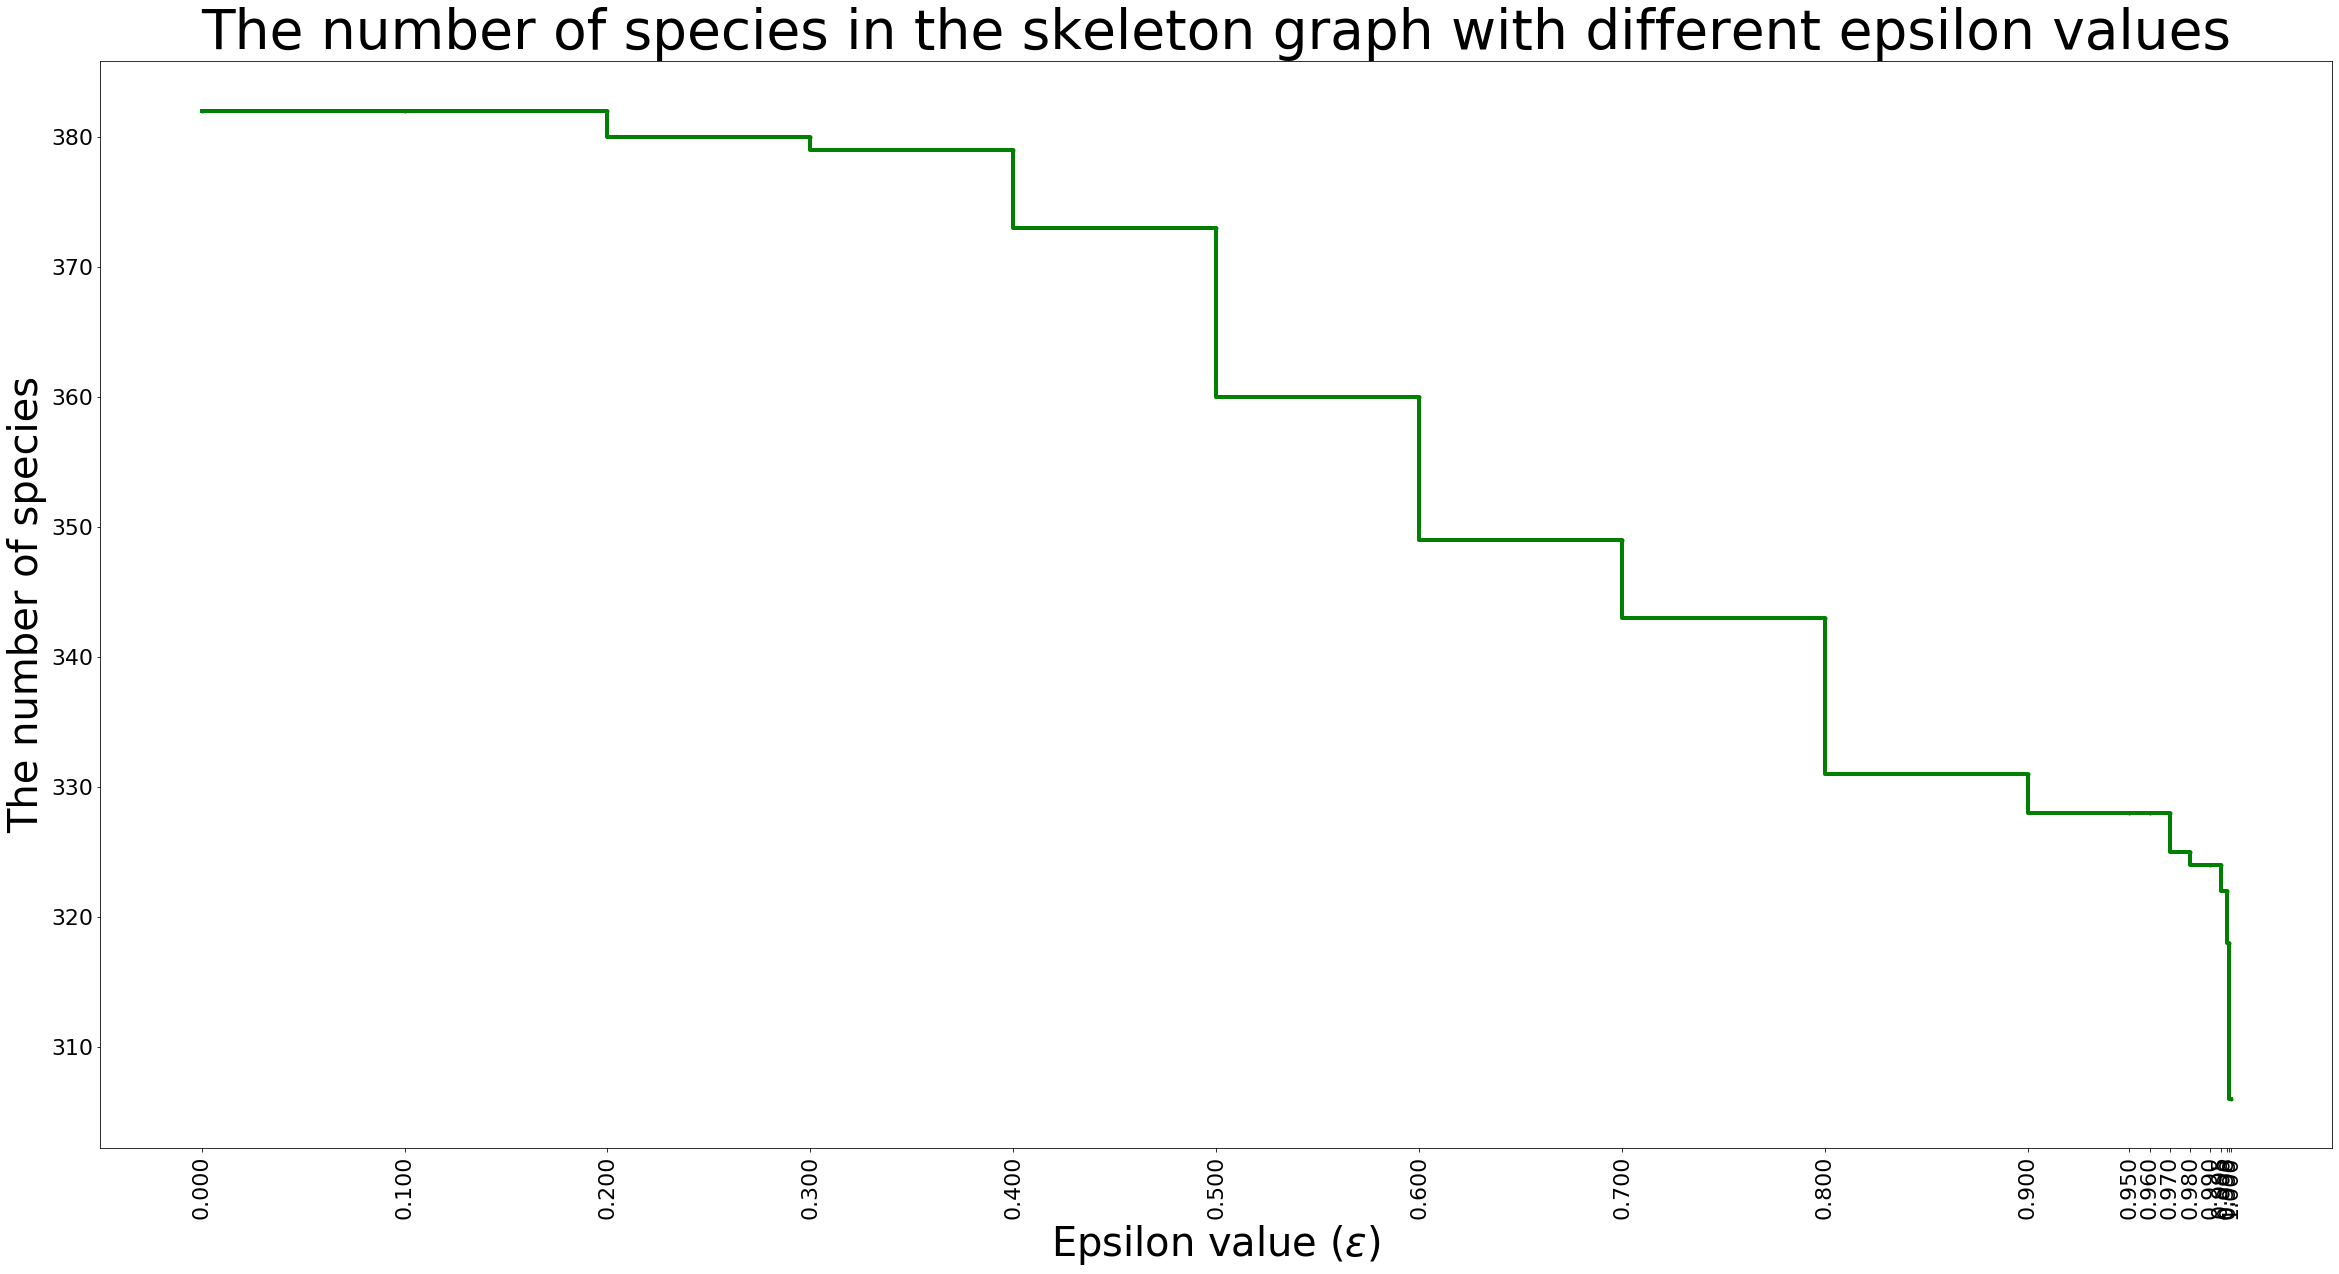

In [14]:
plt.figure(figsize=(40,20))
plt.step(epsilons,nodes_size,marker='.',label='nodes_size',linewidth=4,color='green')
plt.xticks(epsilons,rotation=90,fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Epsilon value ($\epsilon$)',fontsize=40)
plt.ylabel('The number of species',fontsize=40)
plt.title("The number of species in the skeleton graph with different epsilon values",fontsize=55)

Text(0.5, 1.0, 'The number of species in the skeleton graph with different epsilon values (with rounding)')

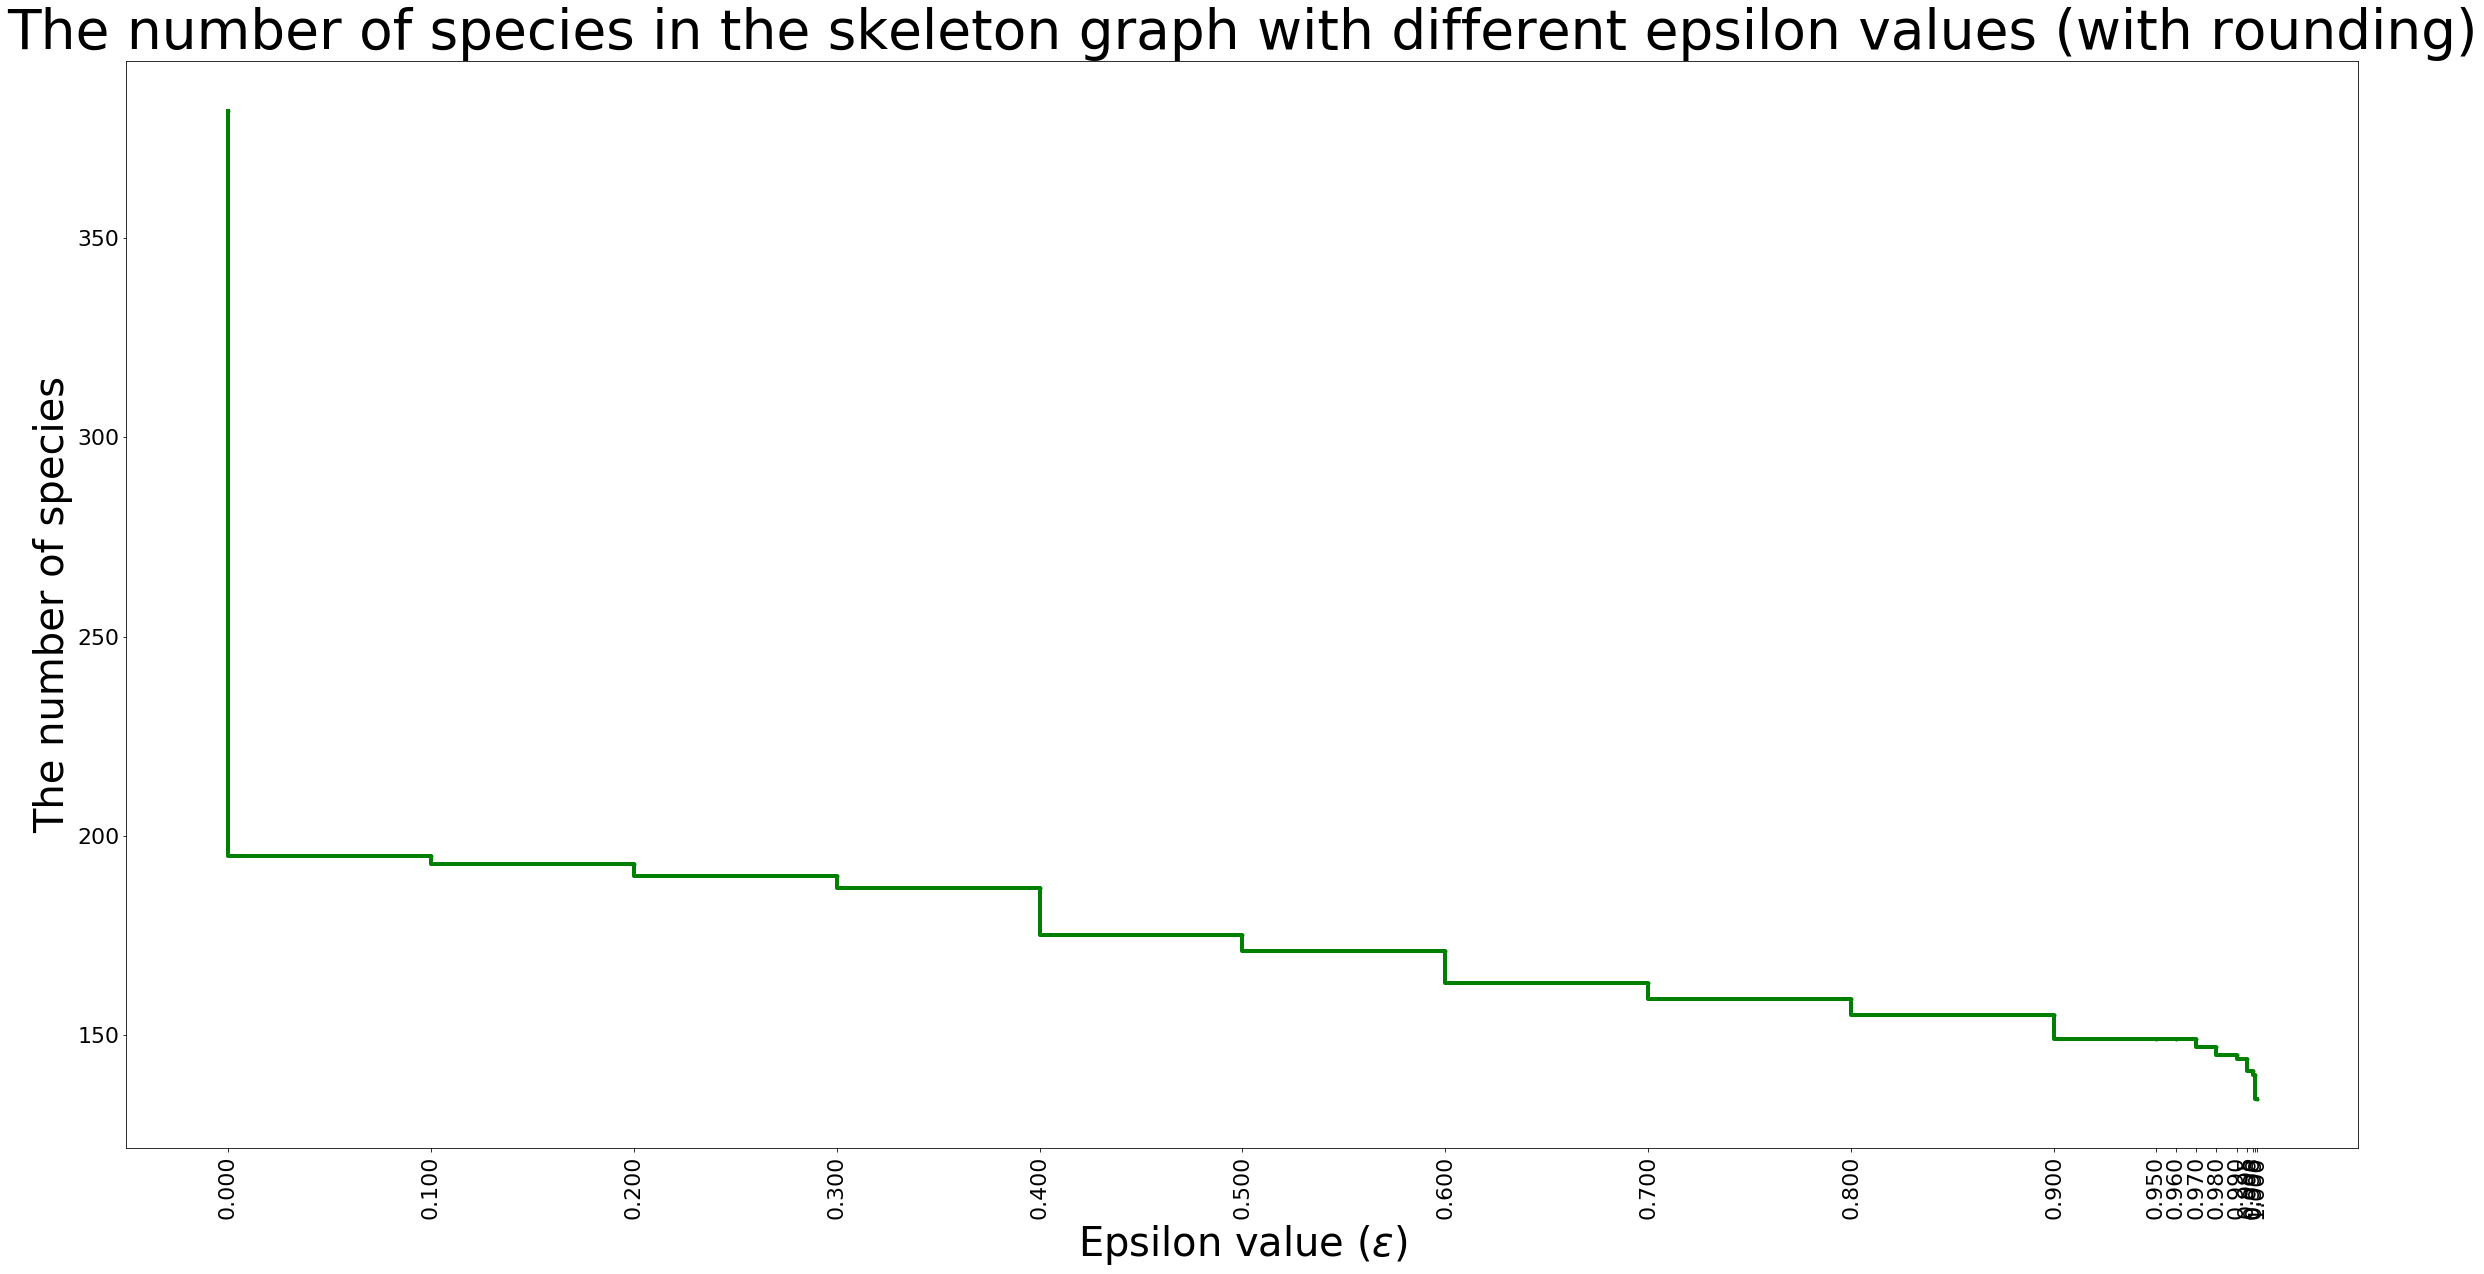

In [15]:
plt.figure(figsize=(40,20))
plt.step(epsilons,nodes_size1,marker='.',label='nodes_size',linewidth=4,color='green')
plt.xticks(epsilons,rotation=90,fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Epsilon value ($\epsilon$)',fontsize=40)
plt.ylabel('The number of species',fontsize=40)
plt.title("The number of species in the skeleton graph with different epsilon values (with rounding)",fontsize=55)

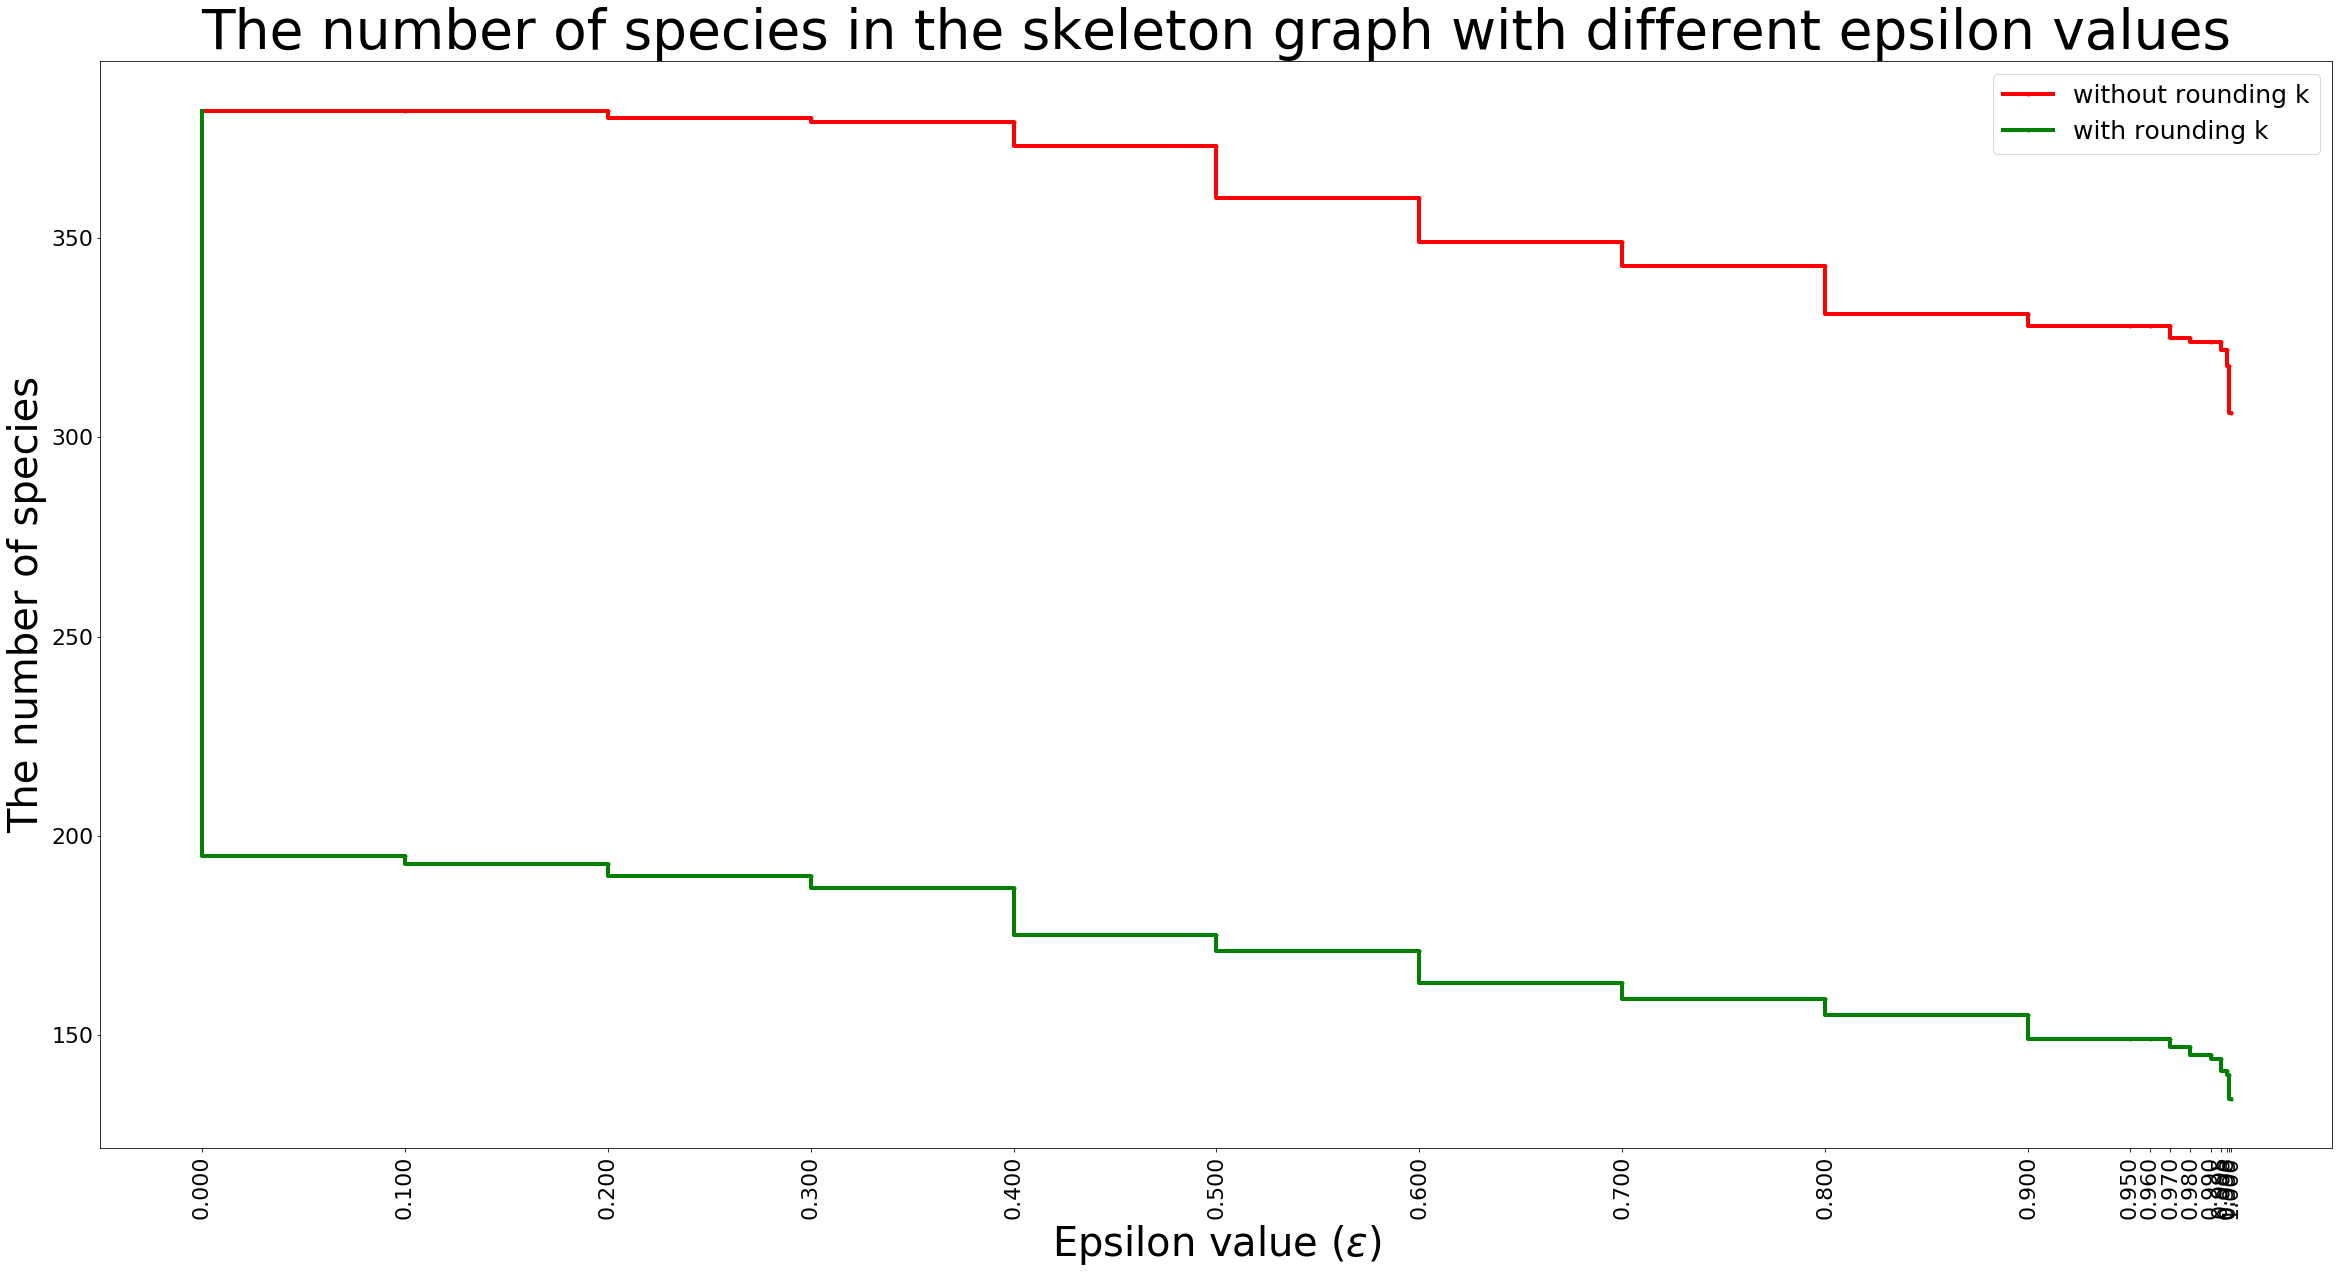

In [16]:
plt.figure(figsize=(40,20))
plt.step(epsilons,nodes_size,marker='.',label='without rounding k',linewidth=4,color='red')
plt.step(epsilons,nodes_size1,marker='.',label='with rounding k',linewidth=4,color='green')
plt.xticks(epsilons,rotation=90,fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Epsilon value ($\epsilon$)',fontsize=40)
plt.ylabel('The number of species',fontsize=40)
plt.title("The number of species in the skeleton graph with different epsilon values",fontsize=55)
plt.legend(prop={'size': 25})